ADAPTIVE BOOST REGRESSION

In [ ]:
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ex2/ml.project.csv')
data

In [ ]:
data.isnull()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [ ]:
X = data.drop('Strength', axis=1)
y = data['Strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, learning_rate=1.0, random_state=42)

In [ ]:
cv_scores = -cross_val_score(ada_boost_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
ada_boost_model.fit(X_train_scaled, y_train)
ab_pred = ada_boost_model.predict(X_test_scaled)
#print(f'Cross-Validation Mean Squared Error: {cv_scores.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

In [ ]:
#Adaptive boosting
mae_ada=mean_absolute_error(y_test,ab_pred)
mse_ada = mean_squared_error(y_test, ab_pred)
r2_ada = r2_score(y_test, ab_pred)
ape_ada= mean_absolute_error(y_test, ab_pred) / y_test.mean() * 100
rmse_ada = mean_squared_error(y_test, ab_pred, squared=False)

In [ ]:
print(f"Mean absolute error: {mae_ada}")
print(f'Mean Squared Error on Test Set: {mse_ada}')
print(f'R-squared on Test Set: {r2_ada}')
print(f'Absolute Percentage Error: {ape_ada:.2f}%')
print(f'Root mean squared Error: {rmse_ada}')


Mean absolute error: 4.037870053386233
Mean Squared Error on Test Set: 35.697498603792205
R-squared on Test Set: 0.8614641072417406
Absolute Percentage Error: 11.32%
Root mean squared Error: 5.974738371158373


MULTIPLE LINEAR REGRESSION

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ex2/ml.project.csv')

In [ ]:
x=df.iloc[:,0:8]
y=df["Strength"]
print(x.shape)
print(y.shape)

(1030, 8)
(1030,)


In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x1_train,y1_train)

LinearRegression()

In [ ]:
ml_pred=model.predict(x1_test)
#y_pred

In [ ]:
#multiple linear regression
mae_multi=mean_absolute_error(y1_test,ml_pred)
mse_multi = mean_squared_error(y1_test, ml_pred)
r2_multi = r2_score(y1_test, ml_pred)
ape_multi = mean_absolute_error(y1_test, ml_pred) / y1_test.mean() * 100
rmse_multi=mean_squared_error(y1_test, ml_pred, squared=False)

In [ ]:
print(f"Mean absolute error: {mae_multi}")
print(f'Mean Squared Error on Test Set: {mse_multi}')
print(f'R-squared on Test Set: {r2_multi}')
print(f'Absolute Percentage Error: {ape_multi:.2f}%')
print(f'Root mean squared Error: {rmse_multi}')

Mean absolute error: 8.298580847947502
Mean Squared Error on Test Set: 109.75080797014401
R-squared on Test Set: 0.5943782479239206
Absolute Percentage Error: 23.69%
Root mean squared Error: 10.47620198211852


GS-SVR

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ex2/ml.project.csv')

In [ ]:
X = data.drop('Strength', axis=1)
y = data['Strength']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

In [ ]:
svm_model = SVR()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

In [ ]:
grid_search=GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y2_train)

best_svm_model = grid_search.best_estimator_

svr_pred = best_svm_model.predict(X_test_scaled)

In [ ]:
#GS-SVR
mae_gs=mean_absolute_error(y2_test,svr_pred)
mse_gs = mean_squared_error(y2_test, svr_pred)
r2_gs = r2_score(y2_test, svr_pred)
ape_gs= mean_absolute_error(y2_test, svr_pred) / y_test.mean() * 100
rmse_gs=mean_squared_error(y2_test, svr_pred, squared=False)

In [ ]:
from re import M
#error metrics
print(f"Mean absolute error: {mae_gs}")
print(f'Mean Squared Error on Test Set: {mse_gs}')
print(f'R-squared on Test Set: {r2_gs}')
print(f'Absolute Percentage Error: {ape_gs:.2f}%')
print(f'Root mean squared Error: {rmse_gs}')

Mean absolute error: 5.2564518192420655
Mean Squared Error on Test Set: 51.06315606992866
R-squared on Test Set: 0.8018326160127531
Absolute Percentage Error: 14.74%
Root mean squared Error: 7.145848869793474


In [ ]:
import matplotlib.pyplot as plt

# Plotting the training data
plt.figure(figsize=(10, 5))
plt.scatter(y2_train, best_svm_model.predict(X_train_scaled), color='blue', label='Training Data')

# Plotting the testing data
plt.scatter(y2_test, svr_pred, color='red', label='Testing Data')

# Plotting the diagonal line
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=4, label='Ideal Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.legend()
plt.grid(True)
plt.show()


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your dataset
data = pd.read_csv("/content/drive/MyDrive/ex2/ml.project.csv")

# Assuming the last column is the target variable (concrete strength)
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]    # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often recommended for ensemble algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

predictions = random_forest_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, predictions)
mse_rf = mean_squared_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')

ape_rf = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f'Absolute Percentage Error: {ape_rf:.2f}%')

# Cross-validation
cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()
cv_mse_std = cv_scores.std()

new_data_point = [260.9, 0.0, 0.0, 175.6, 11.3, 989.6, 788.9, 28]
new_data = scaler.transform([new_data_point])
predicted_strength = random_forest_model.predict(new_data)
print(f'Predicted Concrete Strength: {predicted_strength[0]}')

Mean Absolute Error: 3.734132387309294
Mean Squared Error: 29.847015251758403
R-squared: 0.8841688335094583
Root Mean Squared Error: 5.463242192302882
Absolute Percentage Error: 12.32%
Predicted Concrete Strength: 39.8751


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


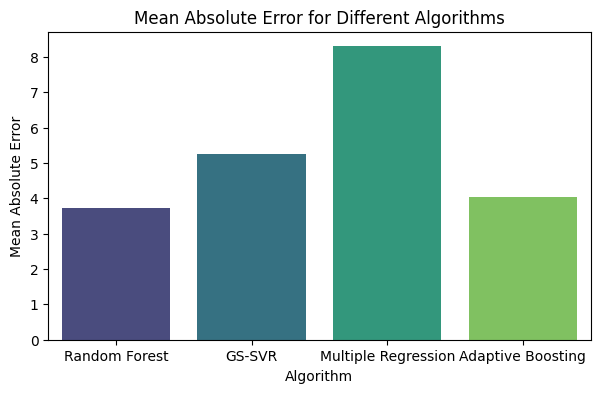

In [ ]:

mae_dict = {
    'Random Forest': mae_rf,
    'GS-SVR': mae_gs,
    'Multiple Regression': mae_multi,
    'Adaptive Boosting': mae_ada
}

# Convert the dictionary to a DataFrame
mae_df = pd.DataFrame(list(mae_dict.items()), columns=['Algorithm', 'Mean Absolute Error'])

# Plotting the bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Algorithm', y='Mean Absolute Error', data=mae_df, palette='viridis')
plt.title('Mean Absolute Error for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Absolute Error')
plt.show()


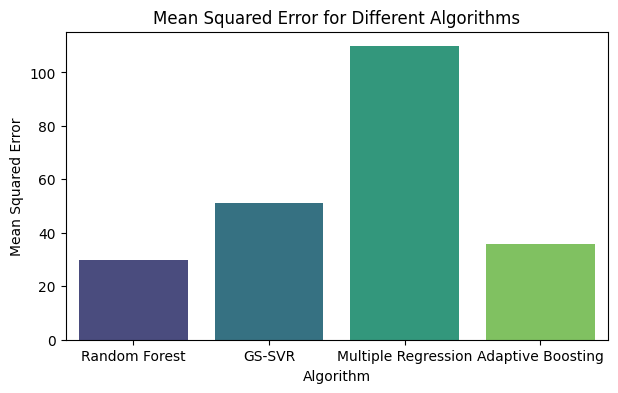

In [ ]:
mse_dict = {
    'Random Forest': mse_rf,
    'GS-SVR': mse_gs,
    'Multiple Regression': mse_multi,
    'Adaptive Boosting': mse_ada
}

# Convert the dictionary to a DataFrame
mse_df = pd.DataFrame(list(mse_dict.items()), columns=['Algorithm', 'Mean Squared Error'])

# Plotting the bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Algorithm', y='Mean Squared Error', data=mse_df, palette='viridis')
plt.title('Mean Squared Error for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.show()

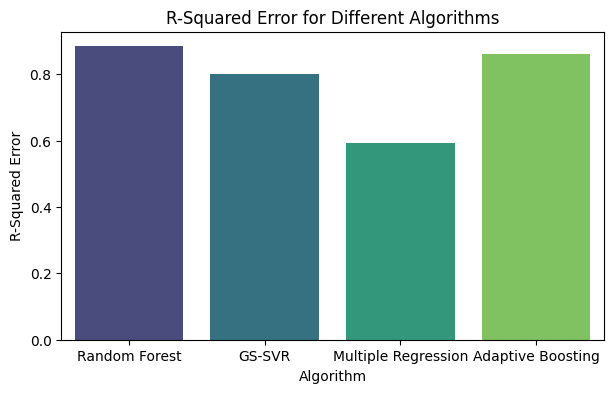

In [ ]:

R2_dict = {
    'Random Forest': r2_rf,
    'GS-SVR': r2_gs,
    'Multiple Regression': r2_multi,
    'Adaptive Boosting': r2_ada
}

# Convert the dictionary to a DataFrame
R2_df = pd.DataFrame(list(R2_dict.items()), columns=['Algorithm', 'R-Squared Error'])

# Plotting the bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Algorithm', y='R-Squared Error', data=R2_df, palette='viridis')
plt.title('R-Squared Error for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('R-Squared Error')
plt.show()

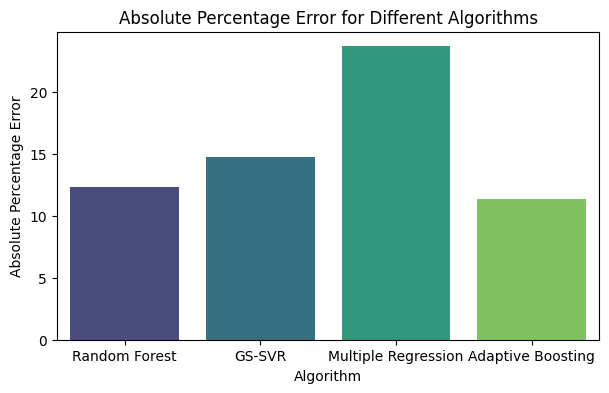

In [ ]:
ape_dict = {
    'Random Forest': ape_rf,
    'GS-SVR': ape_gs,
    'Multiple Regression': ape_multi,
    'Adaptive Boosting': ape_ada
}

# Convert the dictionary to a DataFrame
ape_df = pd.DataFrame(list(ape_dict.items()), columns=['Algorithm', 'Absolute Percentage Error'])

# Plotting the bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Algorithm', y='Absolute Percentage Error', data=ape_df, palette='viridis')
plt.title('Absolute Percentage Error for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Absolute Percentage Error')
plt.show()

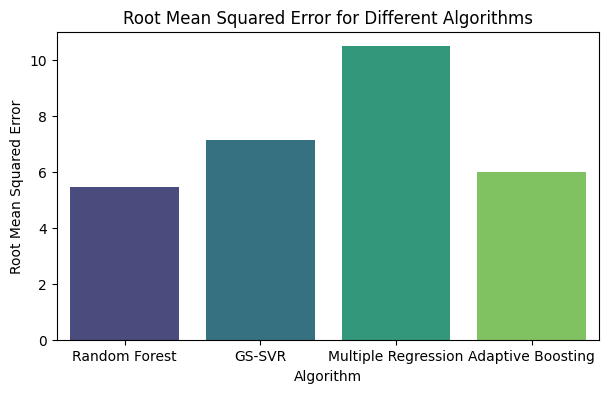

In [ ]:
rmse_dict = {
    'Random Forest': rmse_rf,
    'GS-SVR': rmse_gs,
    'Multiple Regression': rmse_multi,
    'Adaptive Boosting': rmse_ada
}

# Convert the dictionary to a DataFrame
rmse_df = pd.DataFrame(list(rmse_dict.items()), columns=['Algorithm', 'Root Mean Squared Error'])

# Plotting the bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Algorithm', y='Root Mean Squared Error', data=rmse_df, palette='viridis')
plt.title('Root Mean Squared Error for Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Root Mean Squared Error')
plt.show()